# 불만콜 재인입 예측

## 문제 상황
고객이 이동통신 콜센터에 불만이 있어서 전화를 했는데, 조치를 설명해줬음에도 불구하고 고객이 이해하지 못해 다시 전화를 하는 상황이 발생합니다. 이러한 불만콜 재인입 상황을 고객의 특성(성별, 연령, 지역 등)을 기반으로 예측하고자 합니다.

이 노트북에서는 RandomForestClassifier를 사용하여 분류 분석을 수행합니다.

## 데이터 준비
우선, 예제 데이터를 생성하고 불만콜 재인입 여부를 포함한 데이터프레임을 만들어보겠습니다. 어떤 형태의 데이터가 필요한지 눈여겨봐주세요.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 시드 설정
np.random.seed(42)

# 예제 데이터 생성
n_samples = 1000
data = pd.DataFrame({
    'gender': np.random.choice(['M', 'F'], n_samples),
    'age': np.round(np.random.randint(18, 70, n_samples)),
    'region': np.random.choice(['Region1', 'Region2', 'Region3', 'Region4'], n_samples),
    'call_duration': np.round(np.random.randint(1, 20, n_samples)),
    'satisfaction': np.round(np.random.choice([1, 2, 3, 4, 5], n_samples)),
    'repeated_call': np.round(np.random.choice([0, 1], n_samples, p=[0.7, 0.3]))
})

# 범주형 변수 인코딩
data = pd.get_dummies(data, columns=['gender', 'region'], drop_first=True)

# 데이터 확인
data.head()

,age,call_duration,satisfaction,repeated_call,gender_M,region_Region2,region_Region3,region_Region4
0,34,12,2,0,True,True,False,False
1,26,2,4,0,False,False,True,False
2,50,6,1,0,True,False,False,False
3,37,17,3,0,True,False,False,True
4,30,3,3,0,True,False,True,False



## 데이터 분할 및 전처리
데이터를 학습용과 테스트용으로 분할하고 전처리합니다.


In [2]:
# 특성(X)과 타겟(y) 분리
X = data.drop('repeated_call', axis=1)
y = data['repeated_call']

# 학습용 데이터와 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## RandomForestClassifier 모델 학습
RandomForestClassifier를 사용하여 모델을 학습시킵니다.


In [3]:
# RandomForestClassifier 모델 정의 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[191  35]
 [ 66   8]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       226
           1       0.19      0.11      0.14        74

    accuracy                           0.66       300
   macro avg       0.46      0.48      0.46       300
weighted avg       0.61      0.66      0.63       300




## 특성 중요도 시각화
모델의 특성 중요도를 시각화하여 어떤 특성이 불만콜 재인입 예측에 중요한지 확인합니다.


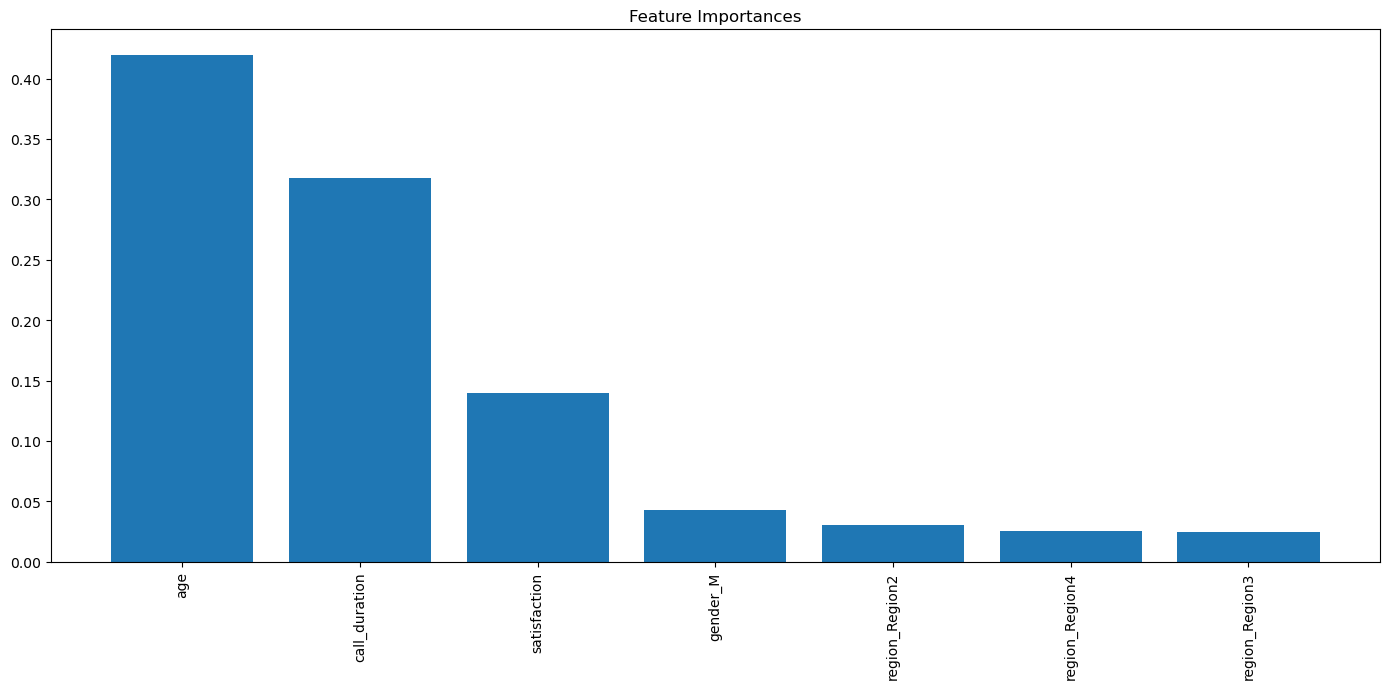

In [4]:
# 특성 중요도
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# 중요도 시각화
plt.figure(figsize=(14, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


## 비즈니스 의사결정
고객의 불만콜 재인입 여부를 사전에 예측함으로써, 고객 센터는 사전 경고 시스템을 통해 재인입을 방지하기 위한 조치를 취할 수 있습니다. 이를 통해 고객 만족도를 향상시키고, 운영 효율성을 높일 수 있습니다.
